# Bagging

### Voting Classifier
- same training set,
- ≠ algorithms.

### Bagging
- one algorithm,
- ≠ subsets of the training set.
- Bagging: Bootstrap Aggregation.
- Uses a technique known as the bootsrap.
- Reduces variance of individual models in the ensemble.

### Bootstrap

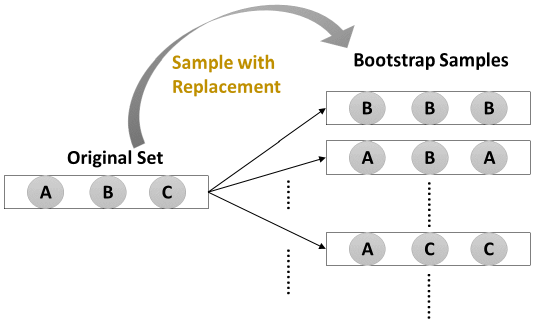

### Treino

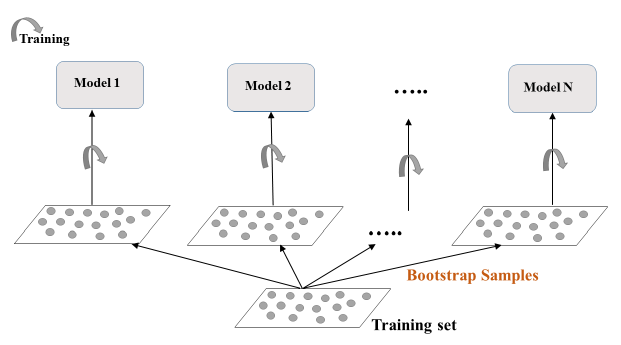

### Bagging: Classification & Regression
- Classification:
    - Aggregates predictions by majority voting.
    - BaggingClassifier in scikit-learn.
- Regression:
    - Aggregates predictions through averaging.
    - BaggingRegressor in scikit-learn.

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42)

bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.930


## Bagging
- some instances may be sampled several times for one model,
- other instances may not be sampled at all.

## Out Of Bag (OOB) instances
- On average, for each model, 63% of the training instances are sampled.
- The remaining 37% constitute the OOB instances.

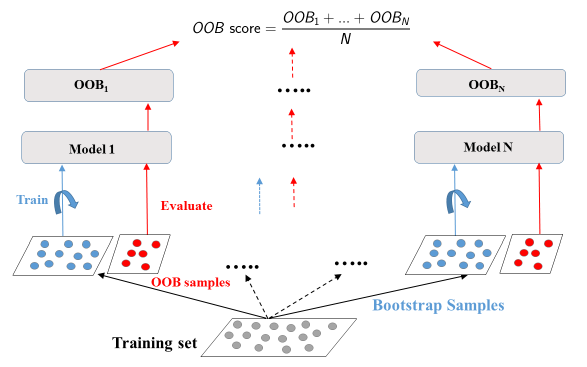

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify= y, random_state=42)
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=42)

bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

print('Test set accuracy: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.930
OOB accuracy: 0.925


## Bagging
- Base estimator: Decision Tree, Logistic Regression, Neural Net, ...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

## Further Diversity with Random Forests
- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement ( d < total number of features )

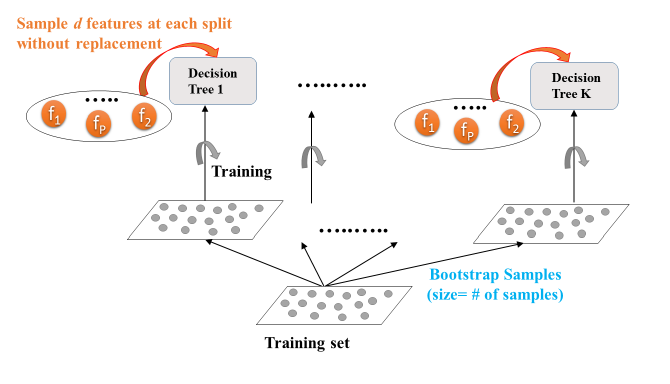

## Classification:
- Aggregates predictions by majority voting
- RandomForestClassifier in scikit-learn

## Regression:
- Aggregates predictions through averaging
- RandomForestRegressor in scikit-learn